In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\SMART TECH\Desktop\AppliedNLPMaterial-master\DataSets\Wholesale customers data.csv")

# Display the first few rows
print(data.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [5]:
# Normalize the data
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Display the first few rows of the normalized data
print(data_scaled.head())


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294  


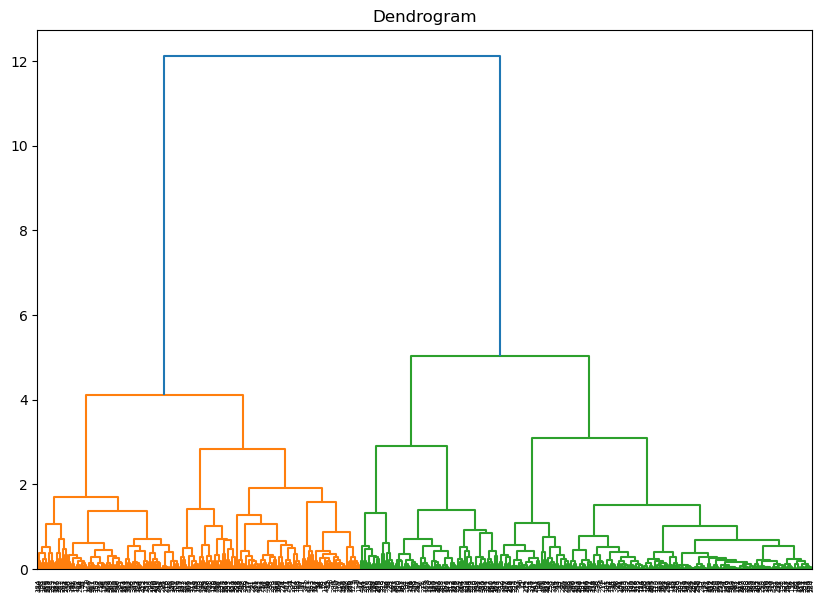

In [7]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.show()


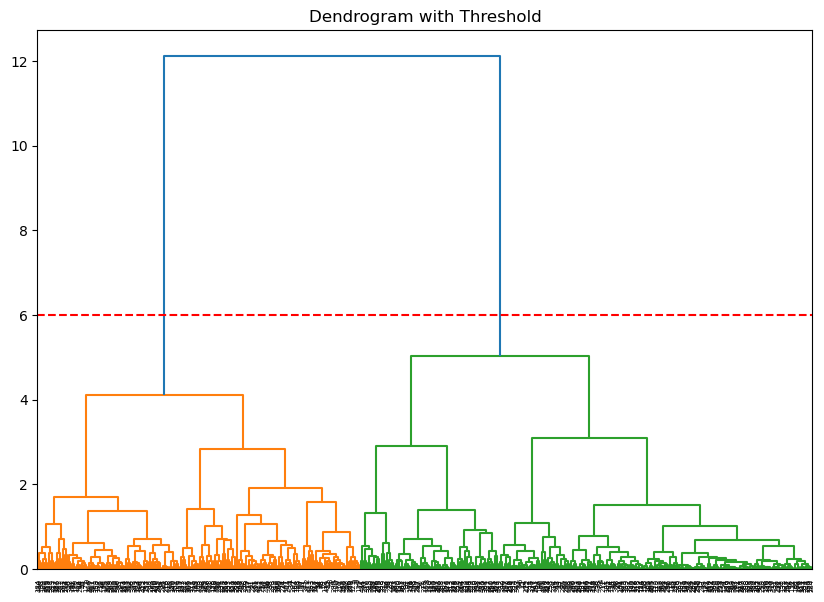

In [9]:
# Plot the dendrogram with a threshold line
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with Threshold")
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()


In [13]:
# Apply Agglomerative Clustering with updated parameter
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = labels



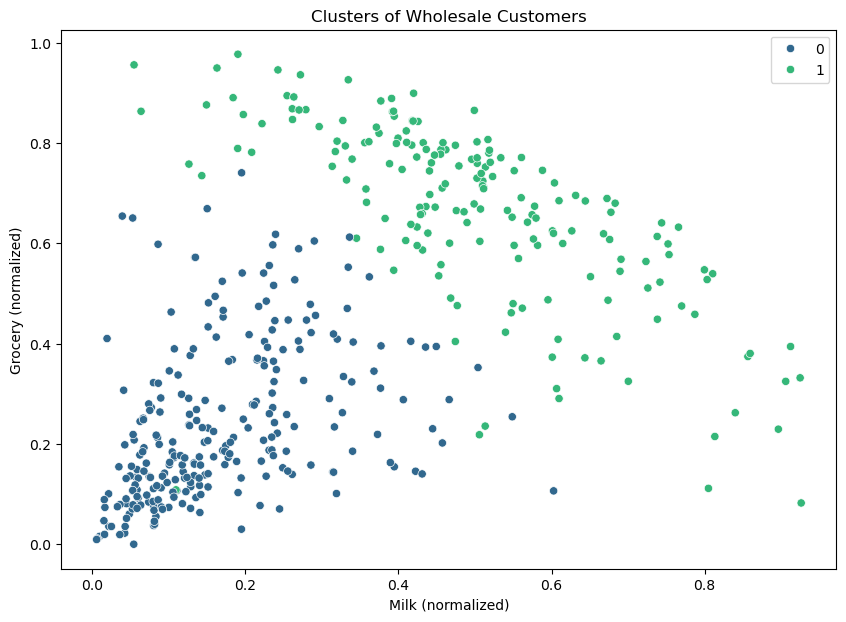

In [15]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled['Milk'], y=data_scaled['Grocery'], hue=labels, palette='viridis')
plt.title("Clusters of Wholesale Customers")
plt.xlabel("Milk (normalized)")
plt.ylabel("Grocery (normalized)")
plt.show()
